In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LG

In [248]:
db=np.load("proyecto_training_data.npy")
df=pd.DataFrame(db)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [249]:
df.columns=["a","b","c","d","e","f"]
df

,a,b,c,d,e,f
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [250]:
stats=df.describe(include='all')
stats

,a,b,c,d,e,f
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [251]:
M=stats.loc["max"]-stats.loc['min']
Rango=pd.DataFrame([M],index=['Rango'])
pd.concat([stats,Rango])

,a,b,c,d,e,f
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
Rango,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


In [252]:
r2=df.corr('pearson',numeric_only=True)
r2
    

,a,b,c,d,e,f
a,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
b,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
c,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
d,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
e,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
f,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


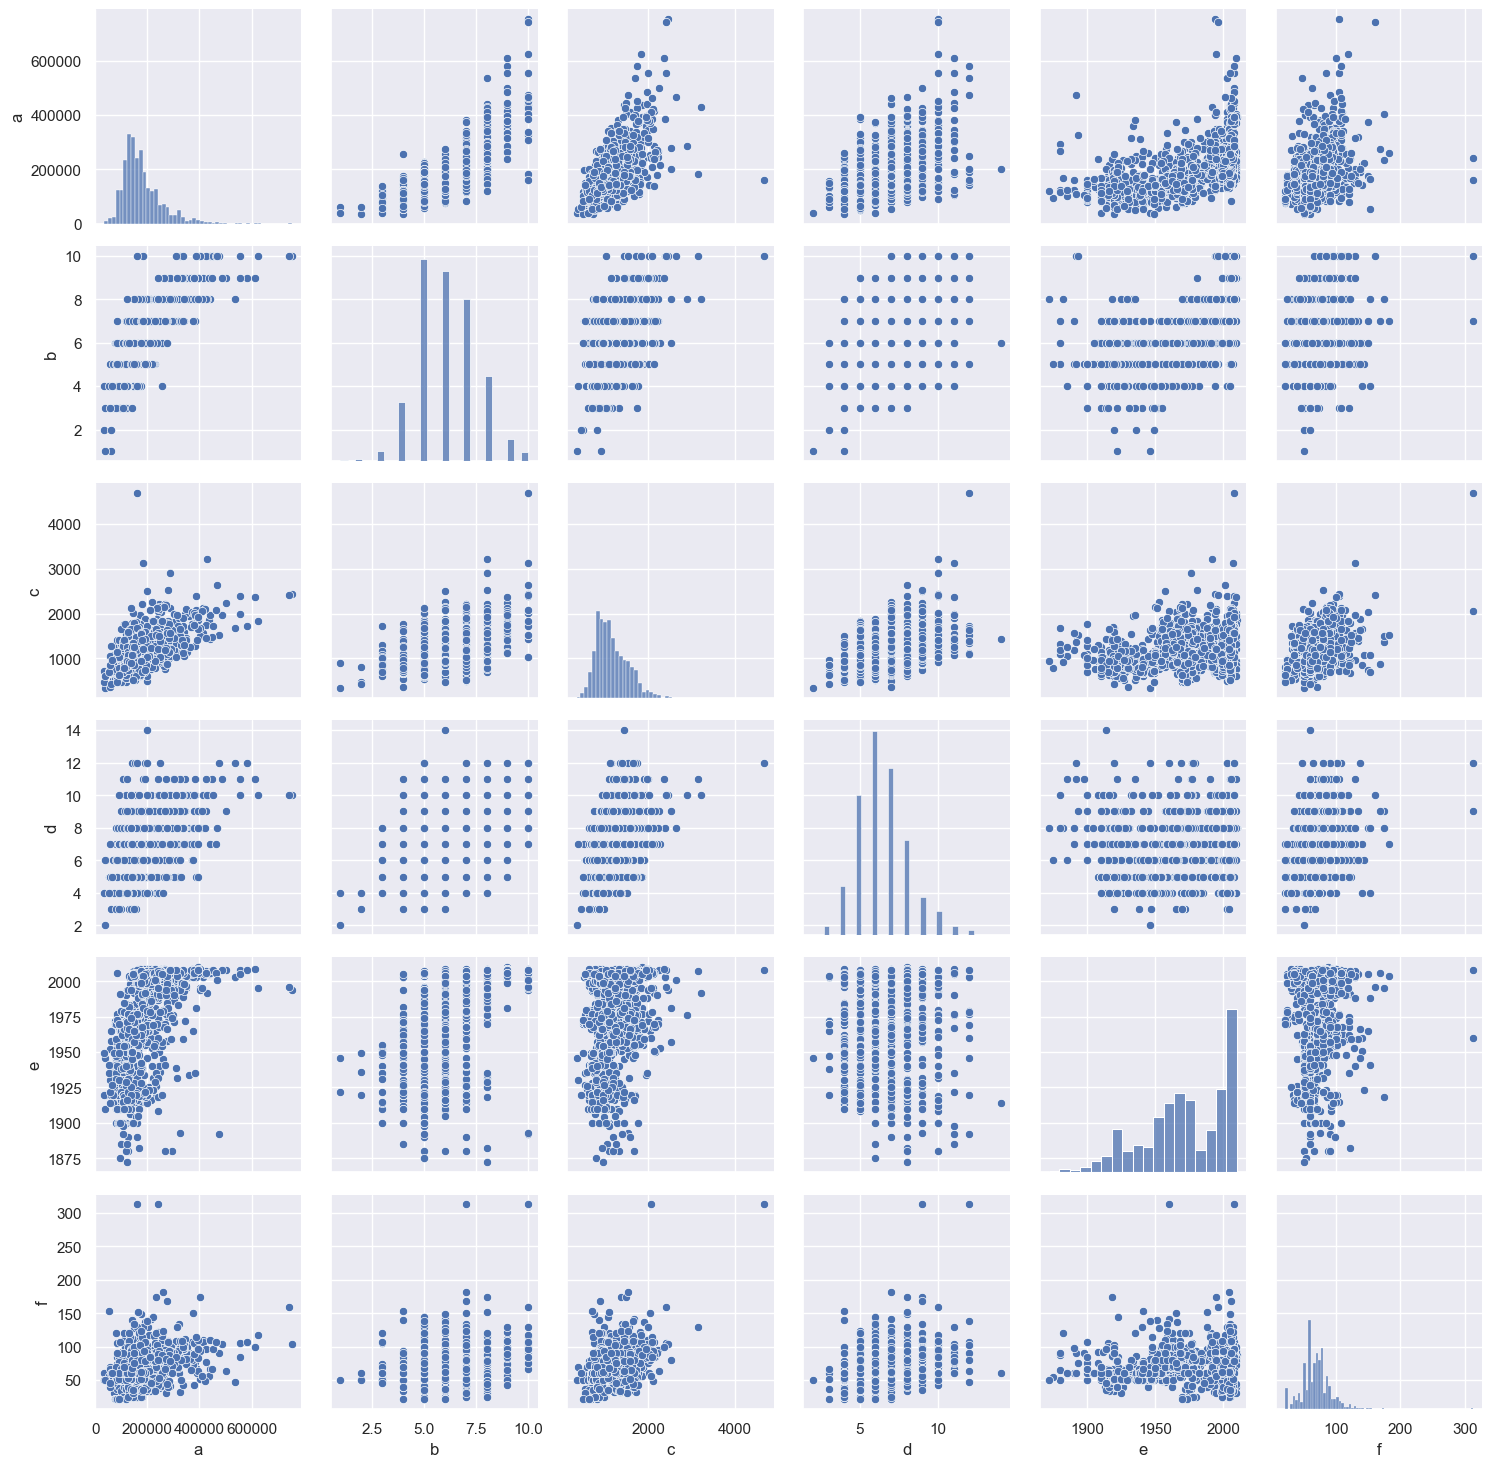

In [253]:
import seaborn as sns
sns.set_theme()
G=sns.PairGrid(df,dropna=True)
G.map_diag(sns.histplot)
G.map_offdiag(sns.scatterplot)


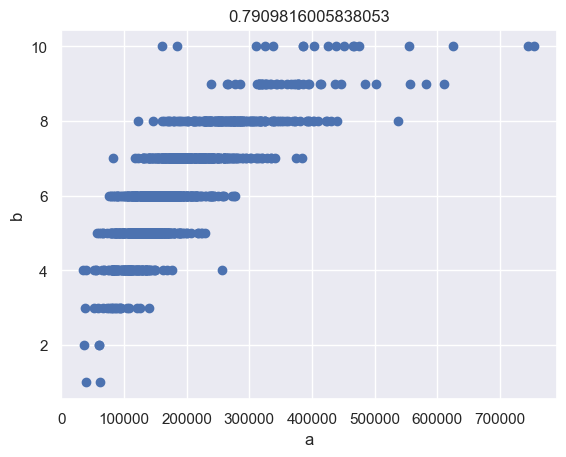

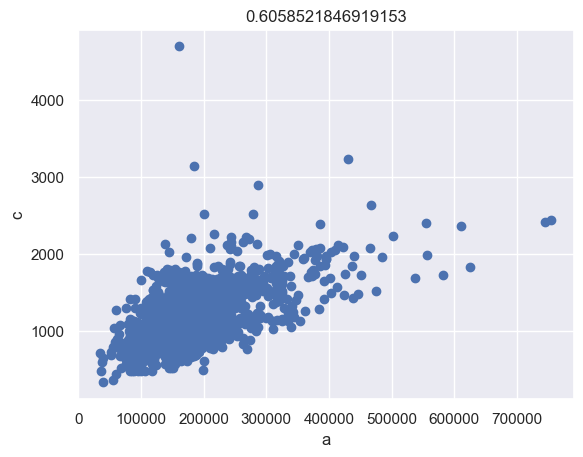

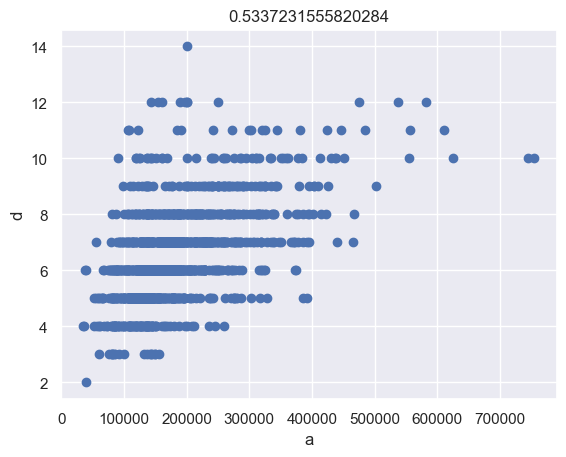

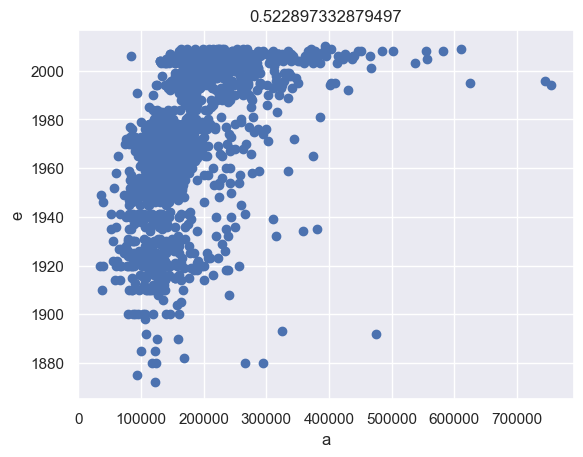

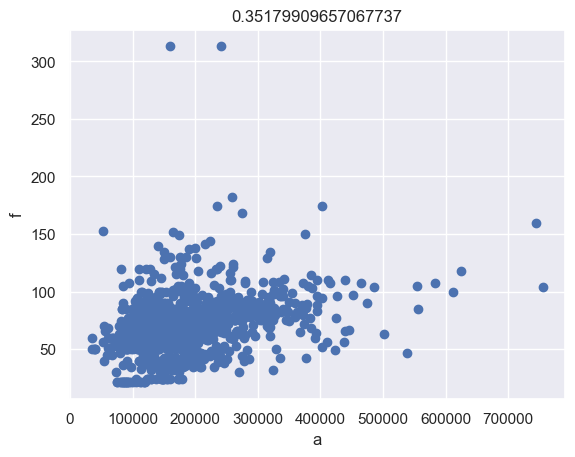

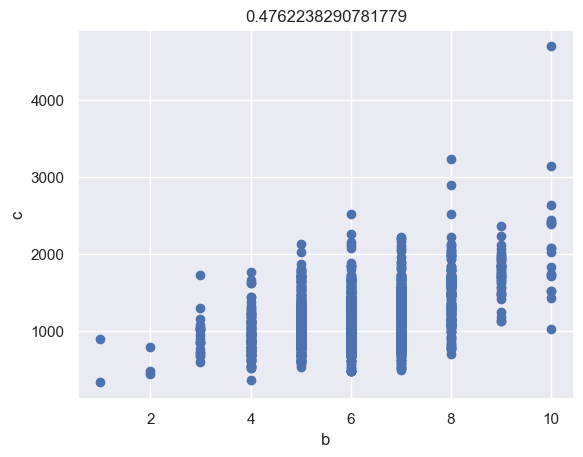

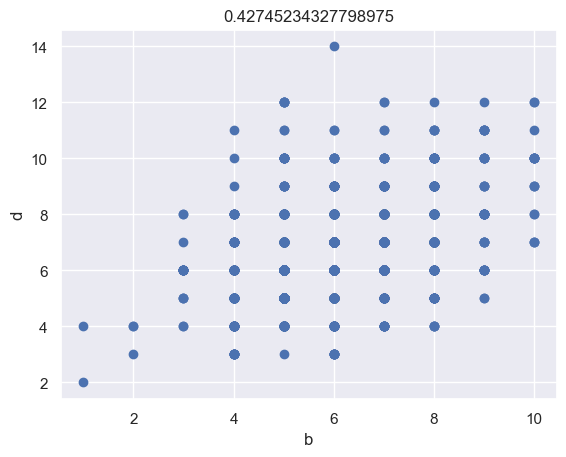

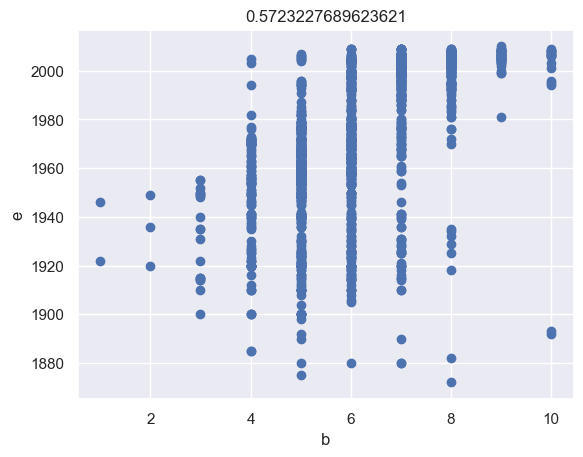

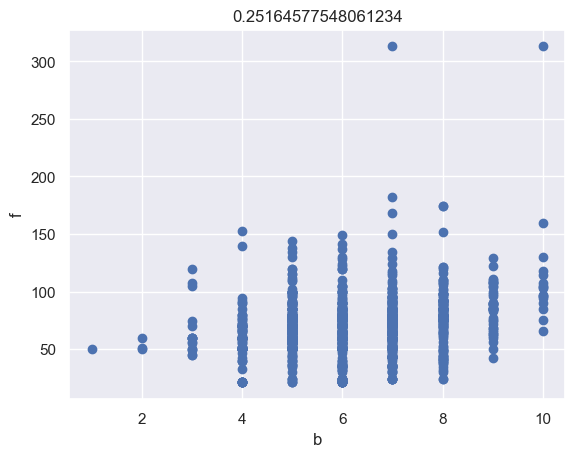

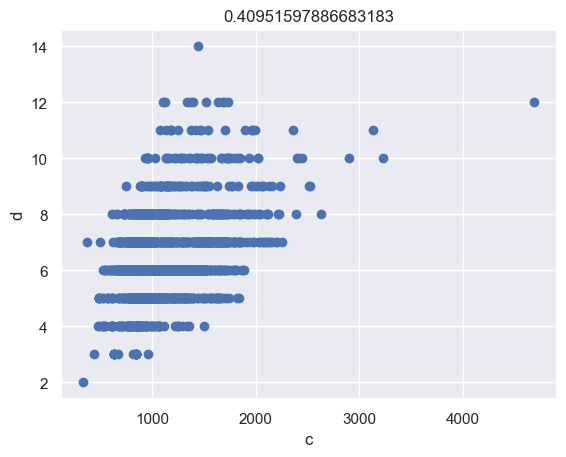

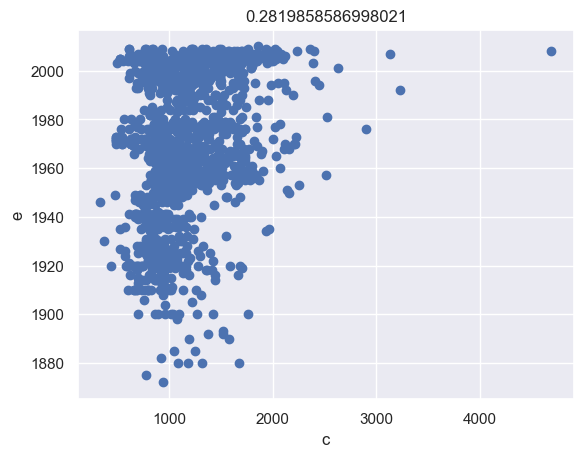

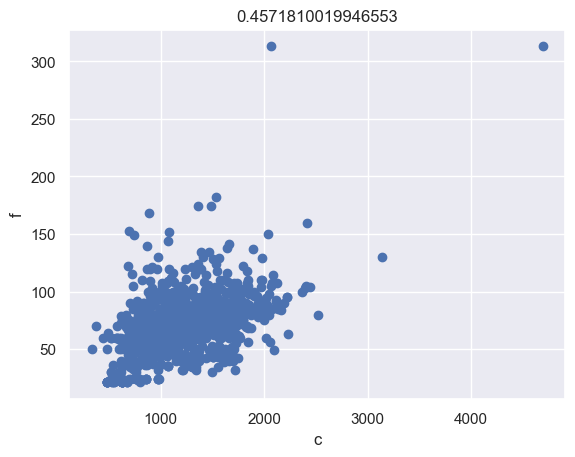

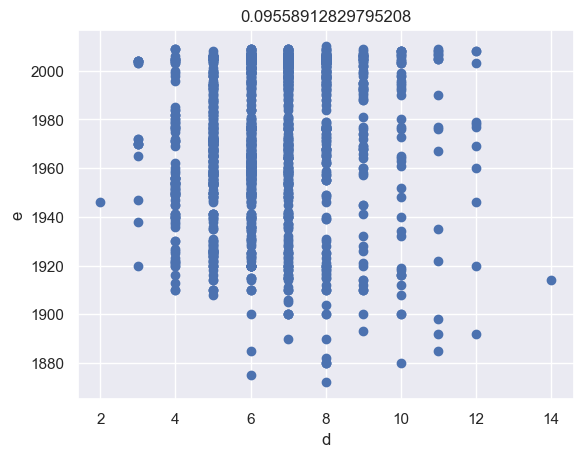

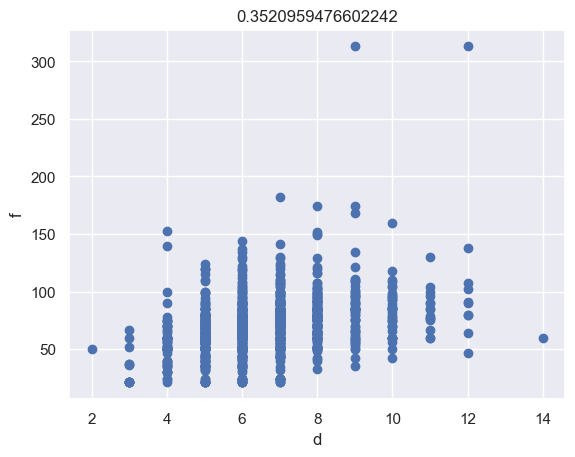

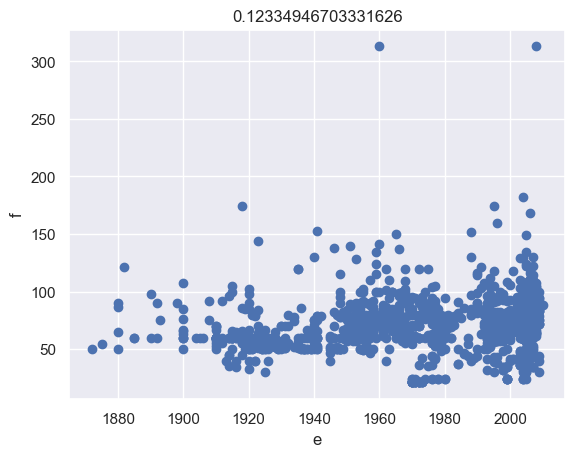

In [254]:
from itertools import combinations

variables=df.columns
Rels=pd.DataFrame(combinations(variables,2))
rtitle=[]
figures = [plt.figure() for _ in range(15)]
for i, fig in enumerate(figures):
    x1=Rels.iloc[i].iloc[0]
    x2=Rels.iloc[i].iloc[1]
    ax = fig.add_subplot(111)
    ax.scatter(df[x1],df[x2])
    ax.set_title(r2[x1][x2])
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)


In [255]:
ma=stats['a']['mean']
mb=stats['b']['mean']
mc=stats['c']['mean']
m0=mc/ma



In [256]:
TD=df.sample(frac=0.8)
id=TD.index
VD=df
VD=VD.drop(id)
print(TD,VD)

             a    b       c     d       e     f
245   241500.0  7.0  1872.0   6.0  1988.0  80.0
199   274900.0  8.0  1713.0   7.0  2004.0  76.0
461   155000.0  7.0   575.0   6.0  1936.0  60.0
418   126000.0  5.0   756.0   7.0  1940.0  60.0
904   125500.0  5.0   902.0   6.0  1967.0   NaN
...        ...  ...     ...   ...     ...   ...
291   135900.0  5.0   936.0   9.0  1912.0  55.0
1058  335000.0  9.0  1130.0  10.0  2008.0  96.0
475   132500.0  5.0   970.0   5.0  1963.0  80.0
914   173733.0  6.0   612.0   4.0  2009.0  30.0
333   207000.0  7.0  1358.0   6.0  2004.0  59.0

[1168 rows x 6 columns]              a     b       c     d       e      f
10    129500.0   5.0  1040.0   5.0  1965.0   70.0
13    279500.0   7.0  1494.0   7.0  2006.0   91.0
16    149000.0   6.0  1004.0   5.0  1970.0    NaN
22    230000.0   8.0  1795.0   7.0  2002.0   75.0
25    256300.0   8.0  1600.0   7.0  2007.0  110.0
...        ...   ...     ...   ...     ...    ...
1440  191000.0   6.0  1423.0  11.0  1922.0   79.0

In [257]:
class Modelo_lineal():
        
    Ei=np.array([])
    x=[]
    y=[]
    Model={}
    Ym=[]
    MB0=0
    MB1=m0

    @staticmethod
    def Randomdata():
        global TD
        global VD
        TD=df.sample(frac=0.8)
        id=TD.index
        VD=df
        VD=VD.drop(id)
        print("Variables TD y VD creadas")
    
    @classmethod
    def Training(cls,x,y,epochs,err_int,alpha):
    
        #toma los vectores introducidos y se asegura que sean np.array
        cls.x=np.array(x)
        cls.y=np.array(y)
        print(cls.x)
        #Almacena variables de utilidad
        n=x.size
        a=alpha
        It=epochs
        #crea una matriz x,ones vertical y horizontal
        xv=cls.x.reshape(-1,1)
        v1=np.ones_like(xv)
        Vx=np.hstack([xv,v1])
        Hx=np.transpose(Vx)
        #Define los parámetros iniciales B1 y B0 y crea la matrix B
        B0=0
        B1=m0
        VB=np.array([B1,B0])
        #crea matriz para almacenar errores y matriz de iteración de B 
        cls.Ei=np.array([])
        Bi=VB
        cls.Model={}
        
        for i in range(It+1):
            Vy=np.matmul(Vx,Bi)
            cls.Ym=Vy
            Dy=(y-Vy)
            e=(1/(2*n))*np.sum(Dy**2)
            eB=np.matmul(Hx,-Dy)
            Mi=np.append(Bi,e)
            cls.Ei=np.append(cls.Ei,e)
            cls.Model[i]=Mi
            Bi=Bi-(a*eB)
            cls.MB0=Bi[1]
            cls.MB1=Bi[0]
        EP=np.arange(0,It,err_int)
        print(f'Convergencia del error: {cls.Ei[EP]}')
    
    @classmethod
    def Error_Plot(cls):
        plt.plot(cls.Ei)
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')

    @classmethod
    def Plot_Modelo(cls,step):
        n=len(cls.Model)
        I=np.arange(step,n,step,)
        mn=np.min(Modelo_lineal.x)
        mx=np.max(Modelo_lineal.x)
        xi=np.linspace(mn,mx,10,endpoint=True)
        figures = [plt.figure() for _ in range(I.size)]
        for i, fig in enumerate(figures):
            ax = fig.add_subplot(111)
            yi=xi*cls.Model[I[i]][0]+cls.Model[I[i]][1]
            lbl='y='+str(cls.Model[I[i]][0])+'x+'+str(cls.Model[I[i]][1])
            ax.scatter(cls.x,cls.y)
            ax.plot(xi,yi,label=lbl)
            ax.legend()
            ax.set_title(f'Iteración {I[i]}')
        cls.Ym=yi
    
    @classmethod
    def Reg(cls,x):
        global Pred
        xt=cls.x.reshape(-1,1)
        yt=cls.y.reshape(-1,1)
        x=np.array(x).reshape(-1,1)
        Reg=LG()
        Reg.fit(xt,yt)
        Ys=Reg.predict(x)
        Ym=x*cls.MB1+cls.MB0
        Yp=(Ys+Ym)/2
        P={'Scikit':Ys[:,0],'Modelo Py':Ym[:,0],'Promedio':Yp[:,0]}
        Pred=pd.DataFrame(P)
        print('Se ha generado la Variable Pred:')
        print(Pred)    
        
        
            
                
  
    

In [258]:
Modelo_lineal.Randomdata()

Variables TD y VD creadas


In [259]:
TD

,a,b,c,d,e,f
482,155000.0,7.0,916.0,7.0,1915.0,50.0
1146,180000.0,6.0,1298.0,5.0,1985.0,NaN
1317,208900.0,7.0,1352.0,5.0,2006.0,47.0
211,186000.0,6.0,1212.0,6.0,2009.0,83.0
1056,185850.0,7.0,1364.0,6.0,2005.0,43.0
...,...,...,...,...,...,...
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1214,134500.0,5.0,999.0,6.0,1962.0,69.0
390,119000.0,5.0,961.0,7.0,1900.0,50.0
1358,177500.0,6.0,769.0,5.0,2000.0,NaN


In [260]:
VD

,a,b,c,d,e,f
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
12,144000.0,5.0,912.0,4.0,1962.0,NaN
24,154000.0,5.0,1060.0,6.0,1968.0,NaN
28,207500.0,5.0,1600.0,6.0,1957.0,47.0
...,...,...,...,...,...,...
1440,191000.0,6.0,1423.0,11.0,1922.0,79.0
1446,157900.0,5.0,1188.0,6.0,1962.0,NaN
1449,92000.0,5.0,630.0,3.0,1970.0,21.0
1450,136000.0,5.0,896.0,8.0,1974.0,60.0


In [261]:
Modelo_lineal.Training(TD['a'],TD['c'],200,10,0.000000000000001)

[155000. 180000. 208900. ... 119000. 177500. 134900.]
Convergencia del error: [76371.20905852 73015.8114382  71680.81516285 71149.66647141
 70938.34083876 70854.26170281 70820.80953224 70807.50007435
 70802.20470285 70800.09785823 70799.2596178  70798.92611096
 70798.7934201  70798.74062695 70798.71962232 70798.71126525
 70798.70794019 70798.70661721 70798.70609077 70798.70588126]


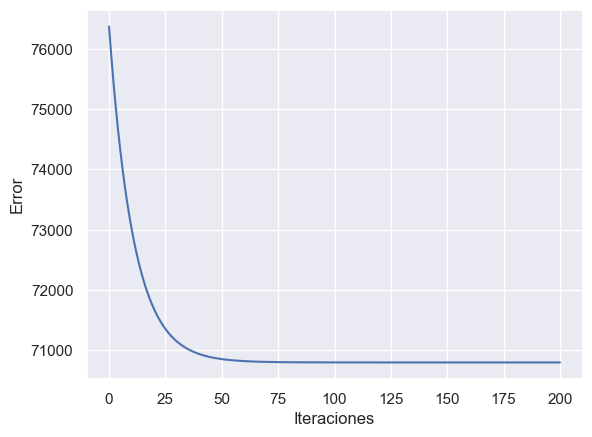

In [262]:
Modelo_lineal.Error_Plot()

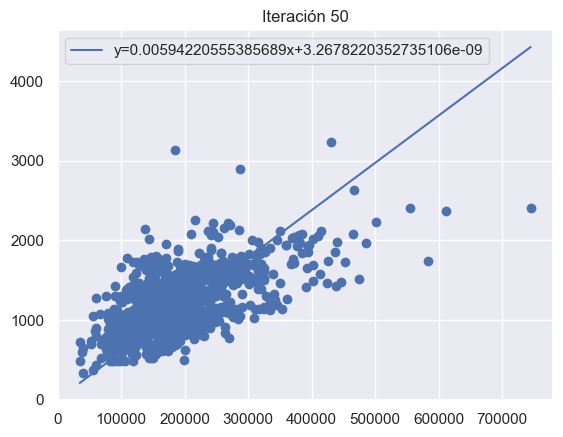

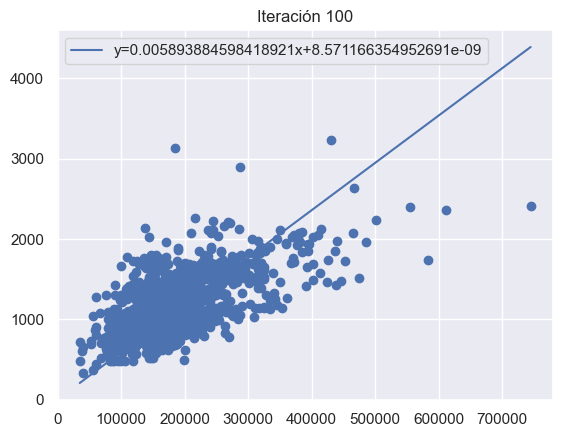

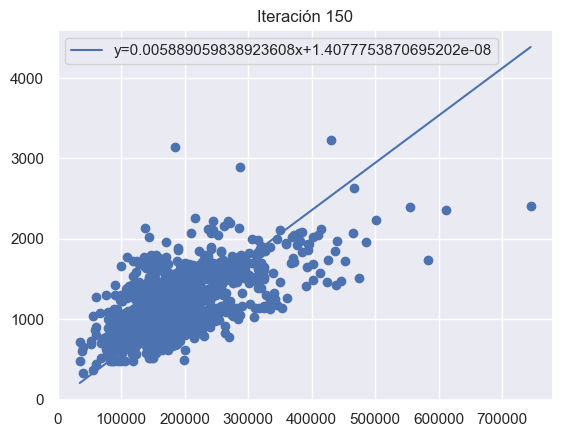

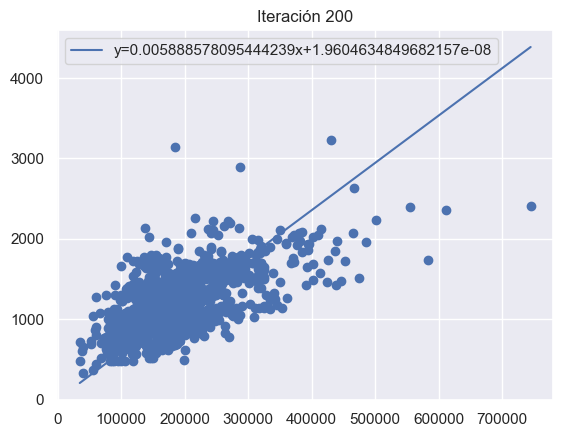

In [263]:
Modelo_lineal.Plot_Modelo(50)

In [264]:
Modelo_lineal.Reg(VD['a'])


Se ha generado la Variable Pred:
          Scikit    Modelo Py     Promedio
0    1159.726954  1068.776488  1114.251721
1    1031.463929   824.400596   927.932263
2    1043.826630   847.954899   945.890765
3    1074.733383   906.840656   990.787020
4    1240.084512  1221.879455  1230.981984
..           ...          ...          ...
287  1189.088369  1124.717957  1156.903163
288  1086.787017   929.806101  1008.296559
289   883.111515   541.748963   712.430239
290  1019.101228   800.846294   909.973761
291   859.931450   497.584646   678.758048

[292 rows x 3 columns]


<BarContainer object of 3 artists>

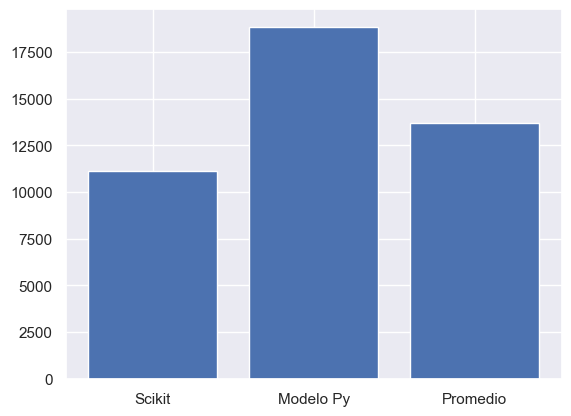

In [265]:
VD.reset_index(drop=True,inplace=True)
n=VD.size
Pred['Y']=VD['c']
DS=Pred['Scikit']-Pred['Y']
DM=Pred['Modelo Py']-Pred['Y']
DP=Pred['Promedio']-Pred['Y']
ES=(1/(2*n))*np.sum(DS**2)
EM=(1/(2*n))*np.sum(DM**2)
EP=(1/(2*n))*np.sum(DP**2)
Lbl=['Scikit','Modelo Py','Promedio']
plt.bar(Lbl,[ES,EM,EP])


In [266]:
Modelo_lineal.Training(TD['a'],TD['b'],300,30,0.000000000000001)

[155000. 180000. 208900. ... 119000. 177500. 134900.]
Convergencia del error: [7.88552787e+05 4.96649400e+04 3.12919097e+03 1.98332178e+02
 1.37443414e+01 2.11885139e+00 1.38666872e+00 1.34055526e+00
 1.33765100e+00 1.33746809e+00]


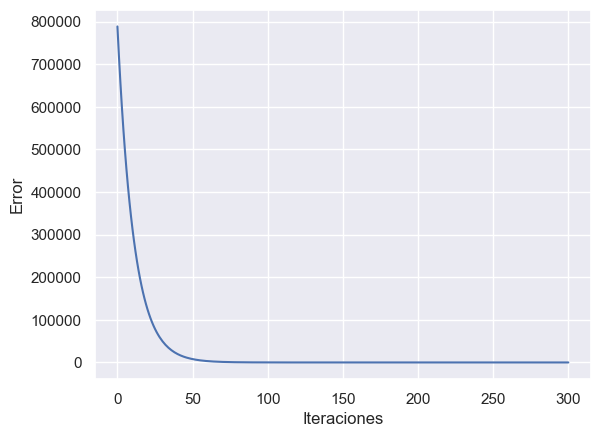

In [267]:
Modelo_lineal.Error_Plot()

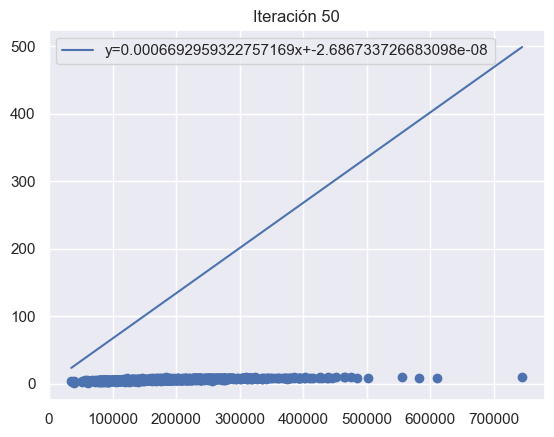

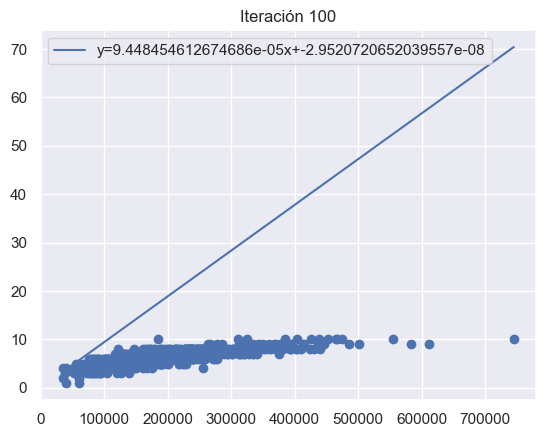

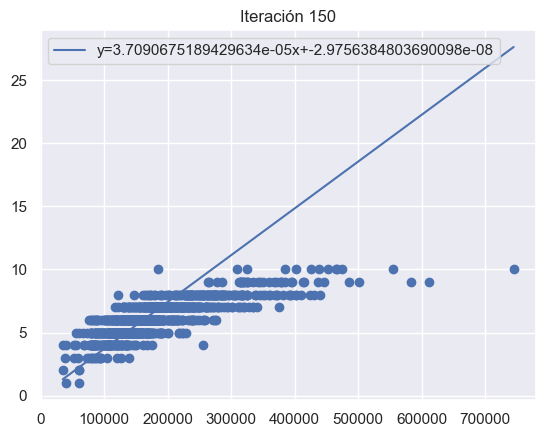

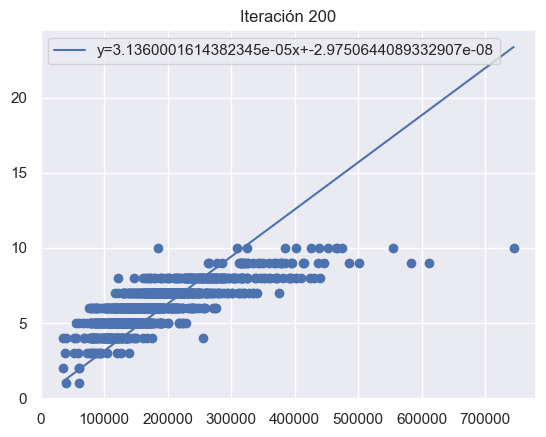

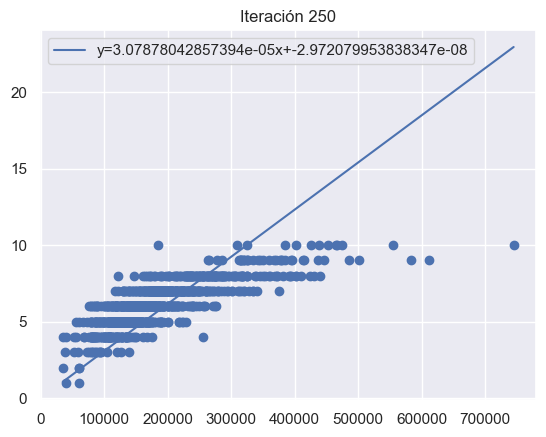

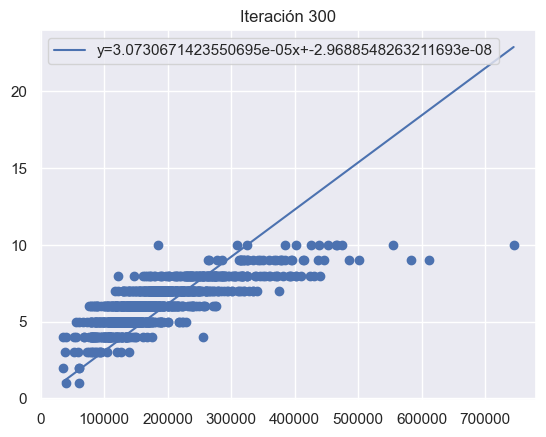

In [268]:
Modelo_lineal.Plot_Modelo(50)

In [269]:
Modelo_lineal.Reg(VD['a'])

Se ha generado la Variable Pred:
       Scikit  Modelo Py  Promedio
0    6.111424   5.577565  5.844495
1    5.519241   4.302254  4.910748
2    5.576319   4.425176  5.000747
3    5.719014   4.732479  5.225747
4    6.482430   6.376555  6.429493
..        ...        ...       ...
287  6.246984   5.869504  6.058244
288  5.774665   4.852328  5.313496
289  4.834307   2.827195  3.830751
290  5.462163   4.179332  4.820748
291  4.727286   2.596718  3.662002

[292 rows x 3 columns]


<BarContainer object of 3 artists>

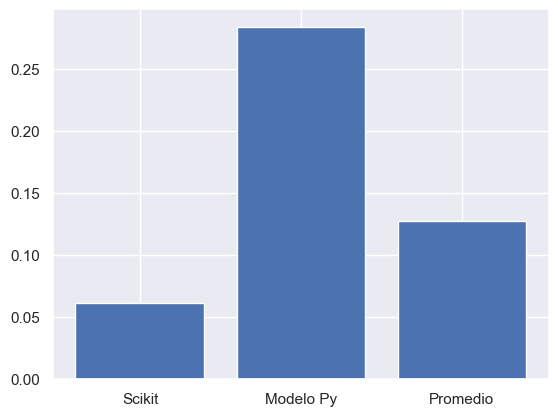

In [270]:
VD.reset_index(drop=True,inplace=True)
n=VD.size
Pred['Y']=VD['b']
DS=Pred['Scikit']-Pred['Y']
DM=Pred['Modelo Py']-Pred['Y']
DP=Pred['Promedio']-Pred['Y']
ES=(1/(2*n))*np.sum(DS**2)
EM=(1/(2*n))*np.sum(DM**2)
EP=(1/(2*n))*np.sum(DP**2)
Lbl=['Scikit','Modelo Py','Promedio']
plt.bar(Lbl,[ES,EM,EP])